In [24]:
import pickle
import matplotlib.pyplot as plt
from pathlib import Path
from natsort import natsorted

In [25]:
cwd = Path.cwd()
models_dir = cwd.parent / "models"
subfolders =  [item for item in models_dir.iterdir() if item.is_dir()]
subfolders = natsorted(subfolders)
for dir in subfolders:
    print(dir)
CTCsmoothing_dict = {'vals': [],
                     'testCERs': []}
nUnits_dict = {'vals': [],
                'testCERs': []}
for subfolder in subfolders:
    if subfolder.name.startswith('CTCsmoothing'):
        print(subfolder.name)
        with open(subfolder / "args", "rb") as handle:
            args = pickle.load(handle)
        CTCsmoothing_dict['vals'].append(args['CTCsmoothing'])
        with open(subfolder / "trainingStats", "rb") as handle:
            trainingStats = pickle.load(handle)
        min_testCER = trainingStats['testCER'].min()
        CTCsmoothing_dict['testCERs'].append(min_testCER)
    elif subfolder.name.startswith('nUnits'):
        print(subfolder.name)
        with open(subfolder / "args", "rb") as handle:
            args = pickle.load(handle)
        nUnits_dict['vals'].append(args['nUnits'])
        with open(subfolder / "trainingStats", "rb") as handle:
            trainingStats = pickle.load(handle)
        min_testCER = trainingStats['testCER'].min()
        nUnits_dict['testCERs'].append(min_testCER)


c:\Users\KatherynZhou\Desktop\BCI class\neural_seq_decoder_project\models\CTCsmoothing0
c:\Users\KatherynZhou\Desktop\BCI class\neural_seq_decoder_project\models\CTCsmoothing0.1
c:\Users\KatherynZhou\Desktop\BCI class\neural_seq_decoder_project\models\CTCsmoothing0.2
c:\Users\KatherynZhou\Desktop\BCI class\neural_seq_decoder_project\models\CTCsmoothing0.4
c:\Users\KatherynZhou\Desktop\BCI class\neural_seq_decoder_project\models\CTCsmoothing0.6
c:\Users\KatherynZhou\Desktop\BCI class\neural_seq_decoder_project\models\CTCsmoothing0.8
c:\Users\KatherynZhou\Desktop\BCI class\neural_seq_decoder_project\models\CTCsmoothing1
c:\Users\KatherynZhou\Desktop\BCI class\neural_seq_decoder_project\models\nUnits32
c:\Users\KatherynZhou\Desktop\BCI class\neural_seq_decoder_project\models\nUnits64
c:\Users\KatherynZhou\Desktop\BCI class\neural_seq_decoder_project\models\nUnits128
c:\Users\KatherynZhou\Desktop\BCI class\neural_seq_decoder_project\models\nUnits256
c:\Users\KatherynZhou\Desktop\BCI class\

[0, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
[0.18340142792290867, 0.18484585861087038, 0.18596013371301226, 0.1864140976435145, 0.1866204448846519, 0.1845982419215055, 0.8742107218026495]


Text(0.5, 0, 'CTC loss smoothing val')

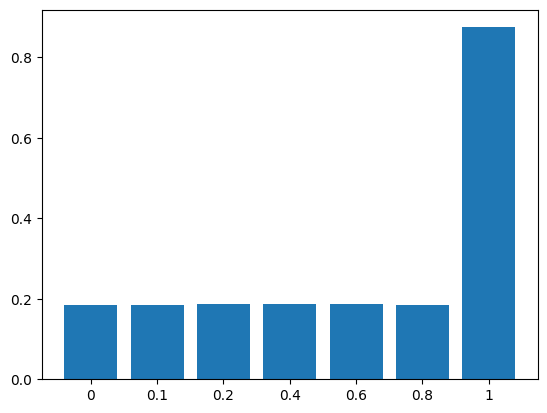

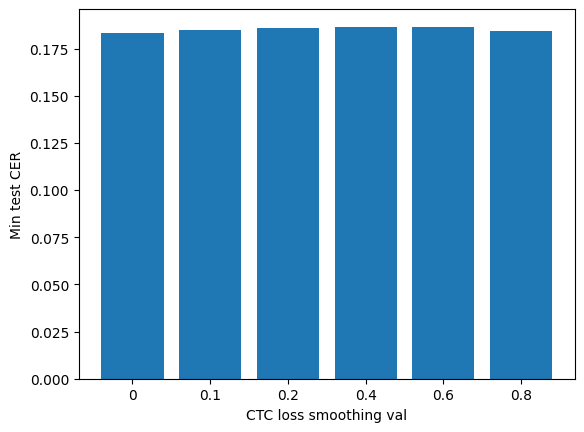

In [29]:
curr_dict = CTCsmoothing_dict
print(curr_dict['vals'])
print(curr_dict['testCERs'])
plt.bar(x=[str(e) for e in curr_dict['vals']], height=curr_dict['testCERs'])
plt.figure()
plt.bar(x=[str(e) for e in curr_dict['vals']][:-1], height=curr_dict['testCERs'][:-1])
plt.ylabel('Min test CER')
plt.xlabel('CTC loss smoothing val')

[32, 64, 128, 256, 512, 1024, 2048]
[0.4494655606454542, 0.3452189344228468, 0.265156204861541, 0.2224423259461021, 0.20189014072881845, 0.18360777516404606, 0.18162684164912715]


Text(0.5, 0, 'CTC loss smoothing val')

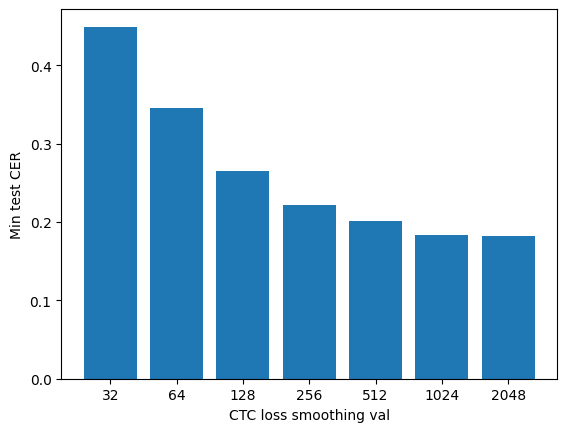

In [30]:
curr_dict = nUnits_dict
print(curr_dict['vals'])
print(curr_dict['testCERs'])
plt.bar(x=[str(e) for e in curr_dict['vals']], height=curr_dict['testCERs'])
plt.ylabel('Min test CER')
plt.xlabel('CTC loss smoothing val')